# Importing the Necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix,roc_curve, auc

## Reading the final csv from project1

- Project1.csv is the result of Exploratory Data Analysis and Feature Engineering in project 1.

In [2]:
data = pd.read_csv('Project1.csv')
data.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,No,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,No,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,Yes,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


## Prep the Data
### Setting the Independent Features and Target Variable

In [3]:
X, y = data.drop('Churn', axis=1), data['Churn']

In [4]:
X.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
     

# Train_Test_split(80/20 ratio)

In [5]:
# Split the dataset into training and test sets (80/20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### X_test is the test set of independent variables for which we will predict the target variable

In [6]:
X_test

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2476,61,25.00,1501.75,0,1,0,1,0,1,1,...,0,0,0,1,1,0,1,0,0,0
6773,19,24.70,465.85,1,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
6116,13,102.25,1359.00,0,1,1,0,0,1,1,...,1,1,0,0,0,1,0,1,0,0
3047,37,55.05,2030.75,0,1,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
4092,6,29.45,161.45,1,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,1,19.05,19.05,0,1,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
5241,12,94.55,1173.55,0,1,1,0,1,0,1,...,1,1,0,0,1,0,0,0,1,0
5456,26,56.05,1553.20,1,0,1,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
5842,35,110.80,3836.30,1,0,0,1,1,0,1,...,1,0,1,0,0,1,1,0,0,0


## Creating Models for the below 6 Classification Algorithms:(With Default Values)
- Logistic Regression (LR)
- Naive Bayes (NB)
     - BernoulliNB
- K-Nearest Neighbors (KNN)
- Decision Tree (DT)
- Random Forest (RF)
- XGBoost Algorithm (XGB)


##  Run all algorithms with default values and report their model performance on the following metrics:
- Accuracy - Measures how often the classifier is correct for both TP and TN = (TP+TN)/total predictions
- Precision - Measures how many were actually positive within the total number of those predicted to be
positive = TP/(TP+FP)
- Recall(SENSITIVITY) - Measures how many times the classsifier got the TP correct = TP/(TP+FN)
- Specificity - Measures how many times the classifier got the TN correctly = TN/(TN+FP)
- **F1 Harmonic Mean of Precision and Recall - We use this score to measure when we are comparing models**

## Calculating metrics based on sklearn.metrics methods:

In [7]:
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,pos_label='Yes')
    recall = recall_score(y_true, y_pred,pos_label='Yes')
    f1 = f1_score(y_true, y_pred,pos_label='Yes')
    return "Accuracy:  "+ str(accuracy),"Precision:  "+ str(precision),"Recall:  " +str(recall),"F1-Score:  "+ str(f1)

## Defining a function to Manually Calculate the Metrics:

In [8]:
def manual_model_evaluation(true_negative, false_positive, false_negative, true_positive):
    accuracy = (true_positive + true_negative)/len(X_test)
    recall = (true_positive)/(true_positive+false_negative)
    specificity = (true_negative)/(true_negative+false_positive)
    precision = (true_positive)/(true_positive+false_positive)
    f1score = (2*precision*recall)/(precision+recall)
    return "Accuracy:  "+ str(accuracy),"Precision:  "+ str(precision),"Recall:  " +str(recall),"Specificity: "+ str(specificity),"F1Score: "+str(f1score)

# 1.Logistic Regression(LR)
Logistic Regression is used when the dependent variable(target) is categorical.
**Binary Logistic Regression**:The categorical response has only two 2 possible outcomes.(Churn or No Churn)

In [9]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
LRmodel = LogisticRegression()

# Train the model on the training data
LRmodel.fit(X_train, y_train)

# Make predictions on the test data
predictions = LRmodel.predict(X_test)

# Evaluating the model
evaluate_model(y_test,predictions)

('Accuracy:  0.7882018479033405',
 'Precision:  0.6233766233766234',
 'Recall:  0.5133689839572193',
 'F1-Score:  0.5630498533724341')

In [10]:
# Evaluating the model performance using manual calculation function
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
manual_model_evaluation(tn,fp,fn,tp)

('Accuracy:  0.7882018479033405',
 'Precision:  0.6233766233766234',
 'Recall:  0.5133689839572193',
 'Specificity: 0.8877057115198451',
 'F1Score: 0.5630498533724341')

## Creating hierarchical indexing in rows and columns for Confusion Matrix Dataframe

In [11]:
rows = pd.MultiIndex.from_tuples([('Actual', 'Yes'), ('Actual', 'No')])
columns = pd.MultiIndex.from_tuples([('Predicted', 'Yes'), ('Predicted', 'No')])

In [12]:
# Show the Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, predictions), index=rows, columns=columns)

Predicted     
                 Yes   No
Actual Yes       917  116
       No        182  192

## The Classification Report gives us info about 
- Text summary of the precision, recall, F1 score for each class.
- The reported averages include 
    - macro average (averaging the unweighted mean per label), 
    - weighted average (averaging the support-weighted mean per label), 
    - sample average (only for multilabel classification).**NOT APPLICABLE IN THIS PROBLEM**

In [13]:
 print(f"\nClassification Report:\n", classification_report(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



**An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:**

- True Positive Rate(Recall)
- False Positive Rate

In the context of a binary classification model (which predicts two classes, often denoted as positive and negative), a classification threshold is a value that separates the predicted probabilities into the two classes. 

## **The closer the ROC curve is to the 45' curve...the less accurate the model is.**

In [14]:
# This implementation is restricted to the binary classification task.
# ROC Curve
LR_fpr, LR_tpr,_ = roc_curve(y_test, LRmodel.predict_proba(X_test)[:, 1],pos_label='Yes')
# print(_)

In [15]:
# AUC
LR_auc_score = auc(LR_fpr, LR_tpr)
LR_auc_score

0.8290788990065796

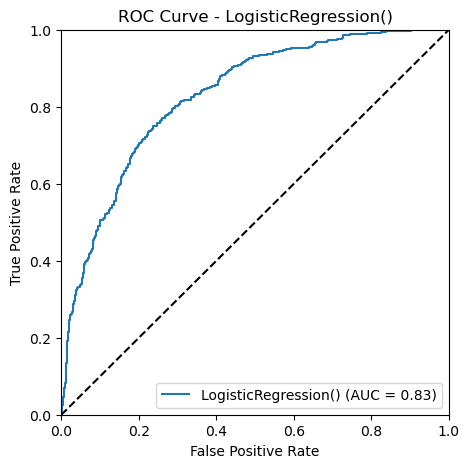

In [16]:
# Plot ROC Curve
plt.figure(figsize=(5, 5))
plt.plot(LR_fpr, LR_tpr, label=f'{LRmodel} (AUC = {LR_auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {LRmodel}')
plt.legend(loc="lower right")
plt.show()

**AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).**

**AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.**

## Higher the AUC value, better the classifier

## Naive Bayes(NB)
Naive Bayes is a Algorithm which assumes that two features are not correlated and are mutually independent(Occurence of one event does not affect the other event). Hence, the name Naive Bayes.

### - BernoulliNB
- For a binary classification problem where the target variable has only two labels (e.g., 'Yes'/'No', 1/0), the **BernoulliNB classifier** is generally more appropriate because it models features as binary-valued (boolean) variables. It assumes that all input features are binary, and it works well when dealing with binary features.

In [17]:
from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Naive Bayes model
Bnb_model = BernoulliNB()

# Train the model
Bnb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = Bnb_model.predict(X_test)

#Evaluate the model
evaluate_model(y_test,predictions)

('Accuracy:  0.6993603411513859',
 'Precision:  0.46236559139784944',
 'Recall:  0.8048128342245989',
 'F1-Score:  0.5873170731707317')

In [18]:
# Evaluating the model performance using manual calculation function
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
manual_model_evaluation(tn,fp,fn,tp)

('Accuracy:  0.6993603411513859',
 'Precision:  0.46236559139784944',
 'Recall:  0.8048128342245989',
 'Specificity: 0.6611810261374637',
 'F1Score: 0.5873170731707317')

In [19]:
# Show the Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, predictions), index=rows, columns=columns)

Predicted     
                 Yes   No
Actual Yes       683  350
       No         73  301

In [20]:
 print(f"\nClassification Report:\n", classification_report(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.66      0.76      1033
         Yes       0.46      0.80      0.59       374

    accuracy                           0.70      1407
   macro avg       0.68      0.73      0.68      1407
weighted avg       0.79      0.70      0.72      1407



In [21]:
# ROC Curve
BNB_fpr, BNB_tpr, _ = roc_curve(y_test, Bnb_model.predict_proba(X_test)[:, 1],pos_label='Yes')
# AUC
BNB_auc_score = auc(BNB_fpr, BNB_tpr)
BNB_auc_score

0.8023176356699504

## K-Nearest Neighbors (KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier


# Create a KNeighborsClassifier model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Evaluate the model performance
evaluate_model(y_test,predictions)

('Accuracy:  0.7697228144989339',
 'Precision:  0.5868055555555556',
 'Recall:  0.45187165775401067',
 'F1-Score:  0.5105740181268882')

In [23]:
# Evaluating the model performance using manual calculation function
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
manual_model_evaluation(tn,fp,fn,tp)

('Accuracy:  0.7697228144989339',
 'Precision:  0.5868055555555556',
 'Recall:  0.45187165775401067',
 'Specificity: 0.8848015488867377',
 'F1Score: 0.5105740181268882')

In [24]:
# Show the Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, predictions), index=rows, columns=columns)

Predicted     
                 Yes   No
Actual Yes       914  119
       No        205  169

In [25]:
print(f"\nClassification Report:\n", classification_report(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.88      0.85      1033
         Yes       0.59      0.45      0.51       374

    accuracy                           0.77      1407
   macro avg       0.70      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



In [26]:
# ROC Curve
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1],pos_label='Yes')
# AUC
KNN_auc_score = auc(KNN_fpr, KNN_tpr)
KNN_auc_score

0.7359360359474247

## Decision Tree (DT)

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Create the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
predictions = dt_model.predict(X_test)

#Evaluate the model performance
evaluate_model(y_test,predictions)

('Accuracy:  0.7128642501776831',
 'Precision:  0.4626865671641791',
 'Recall:  0.49732620320855614',
 'F1-Score:  0.4793814432989691')

In [28]:
# Evaluating the model performance using manual calculation function
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
manual_model_evaluation(tn,fp,fn,tp)

('Accuracy:  0.7128642501776831',
 'Precision:  0.4626865671641791',
 'Recall:  0.49732620320855614',
 'Specificity: 0.7909002904162633',
 'F1Score: 0.4793814432989691')

In [29]:
# Show the Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, predictions), index=rows, columns=columns)

Predicted     
                 Yes   No
Actual Yes       817  216
       No        188  186

In [30]:
print(f"\nClassification Report:\n", classification_report(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.79      0.80      1033
         Yes       0.46      0.50      0.48       374

    accuracy                           0.71      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.71      0.72      1407



In [31]:
# ROC Curve
DT_fpr, DT_tpr, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1],pos_label='Yes')
# AUC
DT_auc_score = auc(DT_fpr, DT_tpr)
DT_auc_score

0.6433833235837677

## Random Forest (RF)

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train, y_train)

# Make Predictions on thetest data
predictions = rf_model.predict(X_test)

# Evaluate the Model Performance
evaluate_model(y_test,predictions)

('Accuracy:  0.7739872068230277',
 'Precision:  0.6007194244604317',
 'Recall:  0.446524064171123',
 'F1-Score:  0.5122699386503068')

In [33]:
# Evaluating the model performance using manual calculation function
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
manual_model_evaluation(tn,fp,fn,tp)

('Accuracy:  0.7739872068230277',
 'Precision:  0.6007194244604317',
 'Recall:  0.446524064171123',
 'Specificity: 0.8925459825750242',
 'F1Score: 0.5122699386503068')

In [34]:
# Show the Confusion Matrix
pd.DataFrame(confusion_matrix(y_test, predictions), index=rows, columns=columns)

Predicted     
                 Yes   No
Actual Yes       922  111
       No        207  167

In [35]:
print(f"\nClassification Report:\n", classification_report(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.89      0.85      1033
         Yes       0.60      0.45      0.51       374

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.68      1407
weighted avg       0.76      0.77      0.76      1407



In [36]:
# ROC Curve
RF_fpr, RF_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1],pos_label='Yes')
# AUC
RF_auc_score = auc(RF_fpr, RF_tpr)
RF_auc_score

0.8076587583022296

## XGBoost Algorithm (XGB)
- installing xgboost
- xgboost only accepts binary labels 0 and 1
- So, Labelencoding the target variable
- What is mapped to 0 and 1. **CHECK**

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [39]:
# Instantiate the LabelEncoder
# To encode the churn YES to 1 and NO to 0 as xgboost only accepts numerical target labels
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [40]:
# Check the mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print(label_mapping)

{'No': 0, 'Yes': 1}


In [41]:
# Create the xgboost classifier
xg_model = xgb.XGBClassifier()

# Now, you can train your XGBoost model
xg_model.fit(X_train, y_train_encoded)

# Make predictions
predictions = xg_model.predict(X_test)

In [43]:
def evaluate_model_xgb(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,pos_label=1)
    recall = recall_score(y_true, y_pred,pos_label=1)
    f1 = f1_score(y_true, y_pred,pos_label=1)
    return "Accuracy:  "+ str(accuracy),"Precision:  "+ str(precision),"Recall:  " +str(recall),"F1-Score:  "+ str(f1)

In [44]:
# Evaluate the model
evaluate_model_xgb(y_test_encoded,predictions)

('Accuracy:  0.7654584221748401',
 'Precision:  0.56875',
 'Recall:  0.48663101604278075',
 'F1-Score:  0.5244956772334293')

In [45]:
# Evaluating the model performance using manual calculation function
tn, fp, fn, tp = confusion_matrix(y_test_encoded, predictions).ravel()
manual_model_evaluation(tn,fp,fn,tp)

('Accuracy:  0.7654584221748401',
 'Precision:  0.56875',
 'Recall:  0.48663101604278075',
 'Specificity: 0.8664085188770572',
 'F1Score: 0.5244956772334293')

In [46]:
# Show the Confusion Matrix
pd.DataFrame(confusion_matrix(y_test_encoded, predictions), index=rows, columns=columns)

Predicted     
                 Yes   No
Actual Yes       895  138
       No        192  182

In [47]:
print(f"\nClassification Report:\n", classification_report(y_test_encoded, predictions))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.49      0.52       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.68      1407
weighted avg       0.76      0.77      0.76      1407



In [48]:
# ROC Curve
XG_fpr, XG_tpr, _ = roc_curve(y_test, xg_model.predict_proba(X_test)[:, 1],pos_label='Yes')
# AUC
XG_auc_score = auc(XG_fpr, XG_tpr)
XG_auc_score

0.8100581867878719


## Comparing the ROC Curves, and AUCs to understand which model performs best with default parameters

<Axes: >

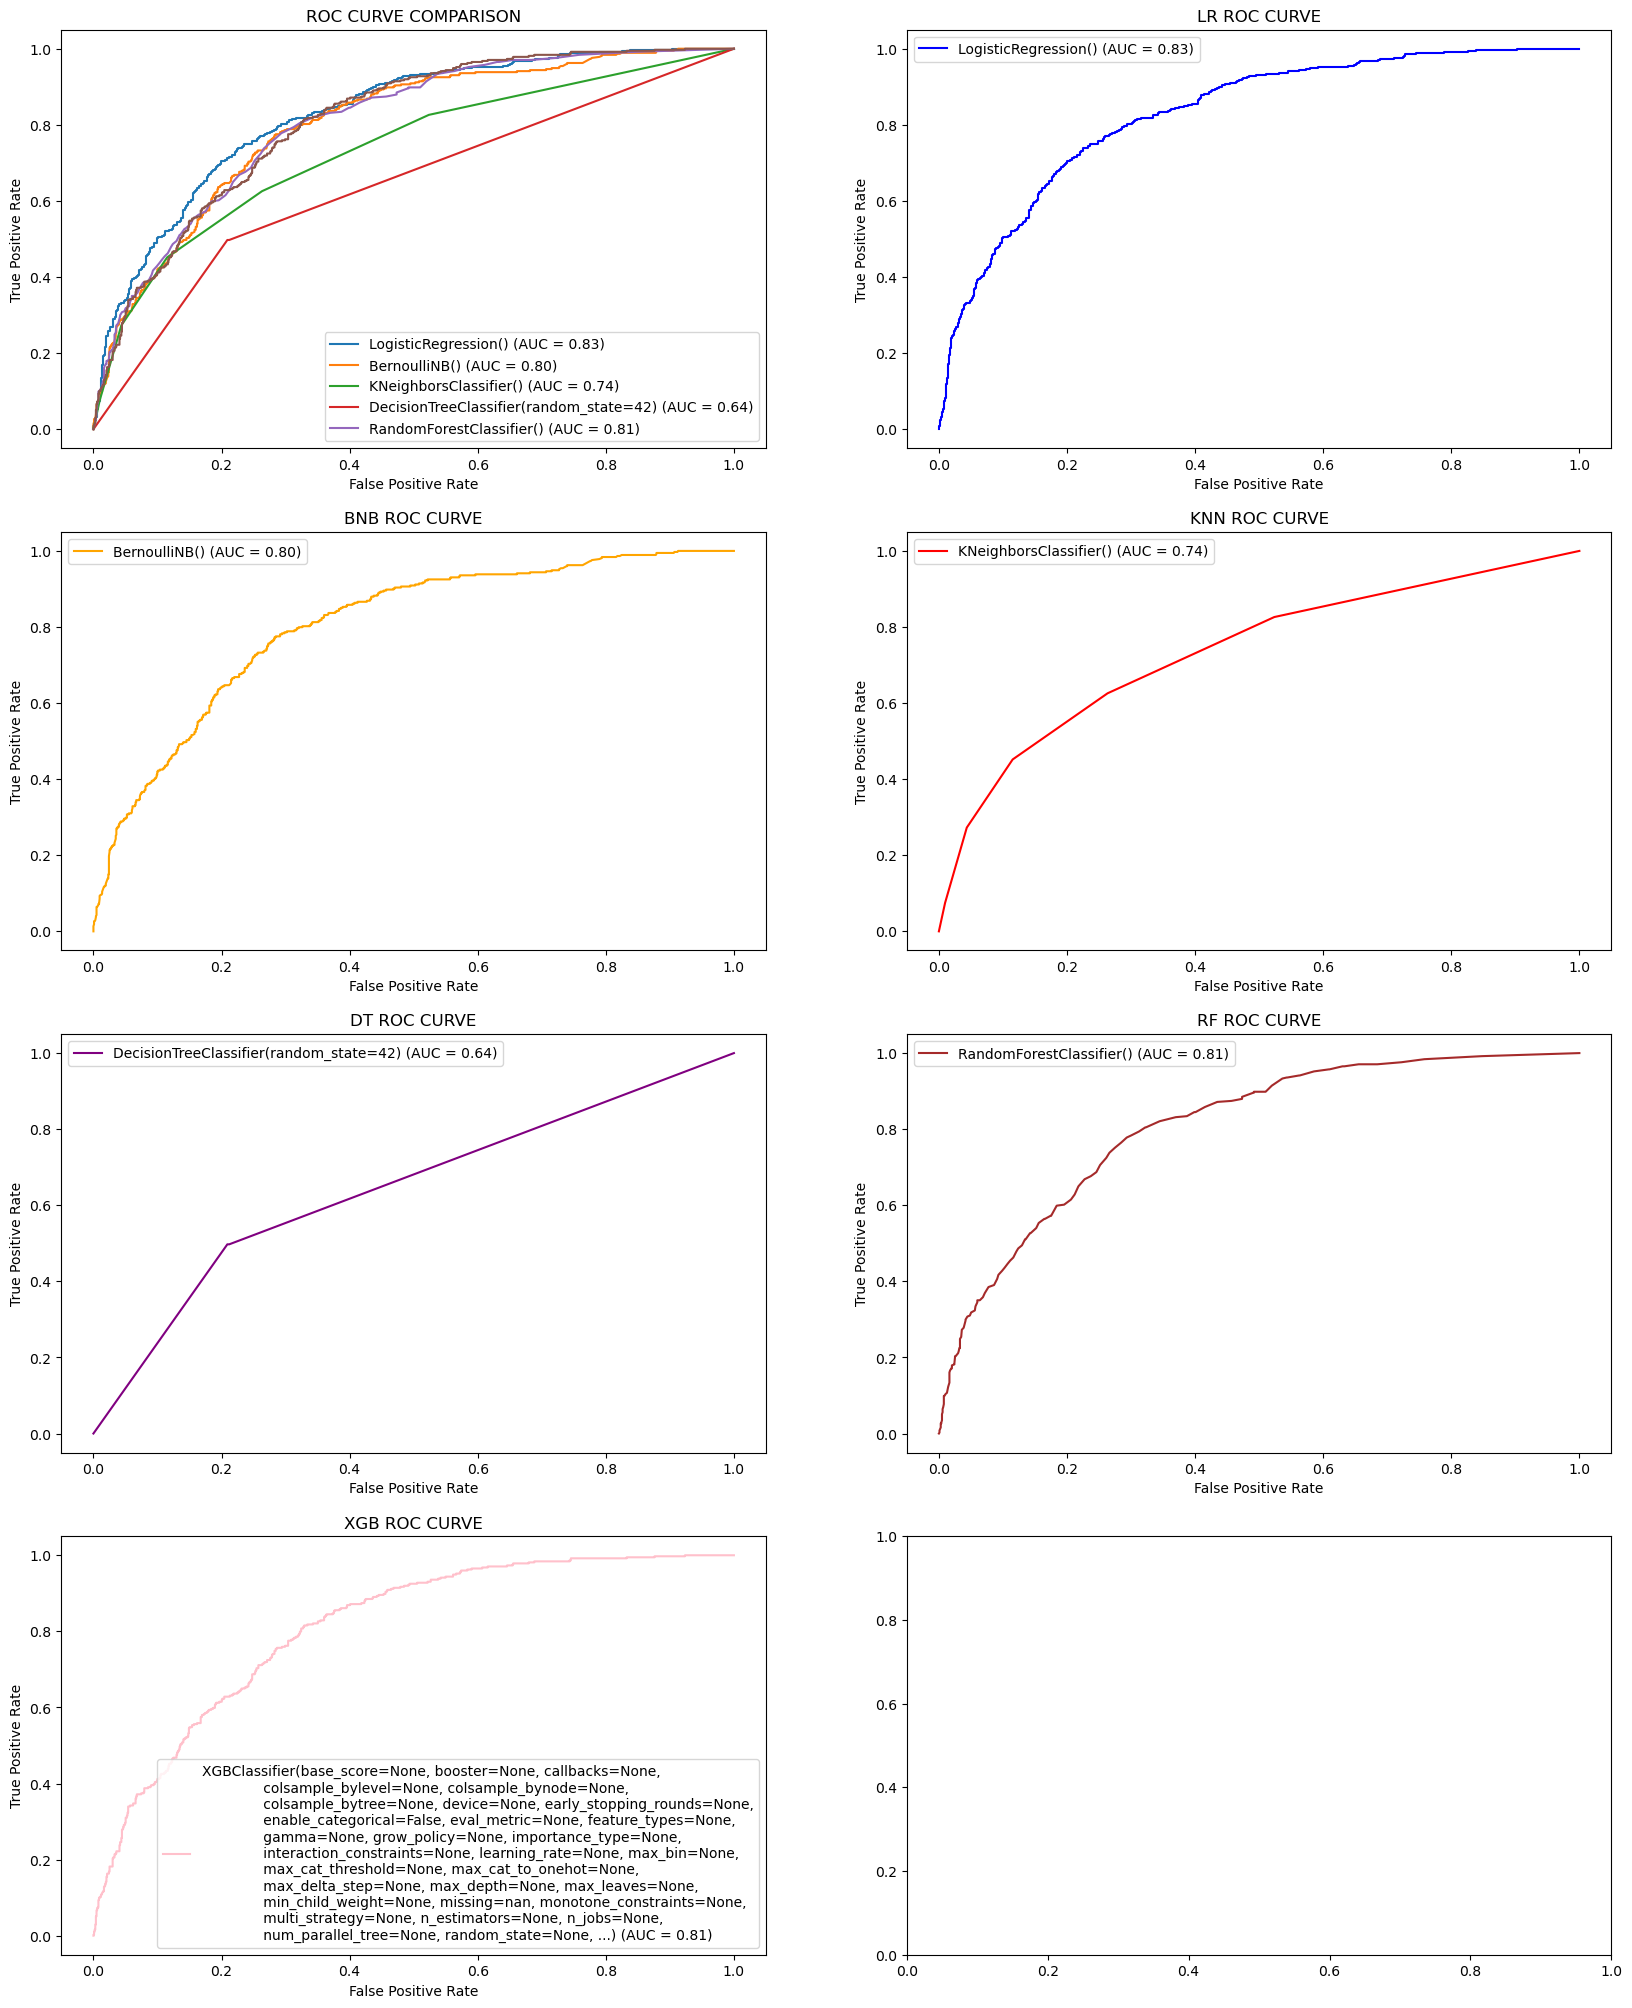

In [49]:
fig,axes = plt.subplots(4,2,figsize=(20,25))
# LR Model
axes[0,0].plot(LR_fpr, LR_tpr, label=f'{LRmodel} (AUC = {LR_auc_score:.2f})')
axes[0,0].set_title('ROC CURVE COMPARISON')
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].legend(loc="best")
axes[0,1].plot(LR_fpr, LR_tpr, label=f'{LRmodel} (AUC = {LR_auc_score:.2f})',color='blue')
axes[0,1].set_title('LR ROC CURVE')
axes[0,1].set_xlabel('False Positive Rate')
axes[0,1].set_ylabel('True Positive Rate')
axes[0,1].legend(loc="best")
# BernoulliNB Model
axes[0,0].plot(BNB_fpr, BNB_tpr, label=f'{Bnb_model} (AUC = {BNB_auc_score:.2f})')
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].legend(loc="best")
axes[1,0].plot(BNB_fpr, BNB_tpr, label=f'{Bnb_model} (AUC = {BNB_auc_score:.2f})',color='orange')
axes[1,0].set_title('BNB ROC CURVE')
axes[1,0].set_xlabel('False Positive Rate')
axes[1,0].set_ylabel('True Positive Rate')
axes[1,0].legend(loc="best")
# Multinominal NB Model
# axes[0,0].plot(MNB_fpr, MNB_tpr, label=f'{Mnb_model} (AUC = {MNB_auc_score:.2f})')
# axes[0,0].set_xlabel('False Positive Rate')
# axes[0,0].set_ylabel('True Positive Rate')
# axes[0,0].legend(loc="best")
# axes[1,1].plot(MNB_fpr, MNB_tpr, label=f'{Mnb_model} (AUC = {MNB_auc_score:.2f})',color='green')
# axes[1,1].set_title('MNB ROC CURVE')
# axes[1,1].set_xlabel('False Positive Rate')
# axes[1,1].set_ylabel('True Positive Rate')
# axes[1,1].legend(loc="best")
# KNN Model
axes[0,0].plot(KNN_fpr, KNN_tpr, label=f'{knn_model} (AUC = {KNN_auc_score:.2f})')
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].legend(loc="best")
axes[1,1].plot(KNN_fpr, KNN_tpr, label=f'{knn_model} (AUC = {KNN_auc_score:.2f})',color='red')
axes[1,1].set_title('KNN ROC CURVE')
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].legend(loc="best")
# Decision Tree Model
axes[0,0].plot(DT_fpr, DT_tpr, label=f'{dt_model} (AUC = {DT_auc_score:.2f})')
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].legend(loc="best")
axes[2,0].plot(DT_fpr, DT_tpr, label=f'{dt_model} (AUC = {DT_auc_score:.2f})',color='purple')
axes[2,0].set_title('DT ROC CURVE')
axes[2,0].set_xlabel('False Positive Rate')
axes[2,0].set_ylabel('True Positive Rate')
axes[2,0].legend(loc="best")
# Random Forest Model
axes[0,0].plot(RF_fpr, RF_tpr, label=f'{rf_model} (AUC = {RF_auc_score:.2f})')
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
axes[0,0].legend(loc="best")
axes[2,1].plot(RF_fpr, RF_tpr, label=f'{rf_model} (AUC = {RF_auc_score:.2f})',color='brown')
axes[2,1].set_title('RF ROC CURVE')
axes[2,1].set_xlabel('False Positive Rate')
axes[2,1].set_ylabel('True Positive Rate')
axes[2,1].legend(loc="best")
# XG Boost Model
axes[0,0].plot(XG_fpr, XG_tpr, label=f'{xg_model} (AUC = {XG_auc_score:.2f})')
axes[0,0].set_xlabel('False Positive Rate')
axes[0,0].set_ylabel('True Positive Rate')
# axes[0,0].legend(loc="best")
axes[3,0].plot(XG_fpr, XG_tpr, label=f'{xg_model} (AUC = {XG_auc_score:.2f})',color='pink')
axes[3,0].set_title('XGB ROC CURVE')
axes[3,0].set_xlabel('False Positive Rate')
axes[3,0].set_ylabel('True Positive Rate')
axes[3,0].legend(loc="lower right")
axes[3,1]

## CONCLUSION

##  Which model performs the best with default parameters
#
- **<font color='orange'>0.83 - Logistic Regression [1]</font>**
- **<font color='pink'>0.81 - Random Forest Classifier [2]</font>**
- **<font color='lightblue'>0.81 - XGBoost [3]</font>**
- 0.80 - Bernoulli Naive Bayes
- 0.74 - KNN Classifier
- 0.64 - Decision Tree Classifier
### Based on AUC - Logistic Regression Model works the best with default parameters
#
- **<font color='orange'>'F1-Score:  0.5873170731707317'-BernoulliNB [1]</font>**
- **<font color='pink'>'F1-Score:  0.5630498533724341'-Logistic Regression [2]</font>**
- **<font color='lightblue'>'F1-Score:  0.5272727272727273'-Random Forest Classifier [3]</font>**
- 'F1-Score:  0.5105740181268882'-KNN Classifier
- 'F1-Score:  0.4793814432989691'-DecisionTree Classifier
- 'F1-Score:  0.5244956772334293'-XGBoost Classifier
### Based on F1Score - Naive Bayes Model works the best for default parameters

# Hyperparameters tuning

## KNN Hyperparameters Tuning

In [50]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNeighborsClassifier model
# knn_model = KNeighborsClassifier(n_neighbors = 8, weights='distance',algorithm='kd_tree',p=1,metric='l1')
knn_model = KNeighborsClassifier(n_neighbors = 8, weights='distance',algorithm='ball_tree',p=1,metric='manhattan')
# knn_model = KNeighborsClassifier(n_neighbors = 8, weights='distance',algorithm='ball_tree',p=1,metric='chebyshev')

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Evaluate the model performance
evaluate_model(y_test,predictions)

('Accuracy:  0.7839374555792467',
 'Precision:  0.6182432432432432',
 'Recall:  0.4893048128342246',
 'F1-Score:  0.5462686567164179')

#### We can see that the F1 score of KNN Model has increased from 0.5105740181268882 to 0.5462686567164179 after Hyperparameter Tuning.

## RF Hyperparameters Tuning

In [217]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=130,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None)

# Train the model
rf_model.fit(X_train, y_train)

# Make Predictions on thetest data
predictions = rf_model.predict(X_test)

# Evaluate the Model Performance
evaluate_model(y_test,predictions)

('Accuracy:  0.7874911158493249',
 'Precision:  0.6237623762376238',
 'Recall:  0.5053475935828877',
 'F1-Score:  0.5583456425406204')

#### We can see that the F1 score of RF Model has increased from 0.5272727272727273 to 0.5583456425406204 after Hyperparameter Tuning.

## Tuning XGBoost Hyperparameters

In [51]:
# Create the xgboost classifier
xg_model = xgb.XGBClassifier(learning_rate=11,n_estimators=200)

# Now, you can train your XGBoost model
xg_model.fit(X_train, y_train_encoded)

# Make predictions
predictions = xg_model.predict(X_test)

# Evaluate the model
evaluate_model_xgb(y_test_encoded,predictions)

('Accuracy:  0.7242359630419332',
 'Precision:  0.4866920152091255',
 'Recall:  0.6844919786096256',
 'F1-Score:  0.5688888888888889')

#### We can see that the F1 score of XGBoost Model has increased from 0.5244956772334293 to 0.5688888888888889 after Hyperparameter Tuning.

## After hyperparameter tuning, We see that the order of model performance(best to low) has changed below:


- **<font color='orange'>'F1-Score:  0.5873170731707317'-BernoulliNB [1]</font>**
- **<font color='pink'>'F1-Score:  0.5688888888888889'-XGBoost Classifier[2]</font>**
- **<font color='lightblue'>'F1-Score:  0.5583456425406204'-Random Forest Classifier [3]</font>**
- 'F1-Score:  0.5105740181268882'-KNN Classifier
- 'F1-Score:  0.4793814432989691'-DecisionTree Classifier
- 'F1-Score:  0.5630498533724341'-Logistic Regression 
### Based on F1Score - Naive Bayes Model works the best even after hyperparameter tuning